In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Loading Olympic edition DataFrame

In [2]:
#Cargamos los datos
editions = pd.read_csv('Summer Olympic medalists 1896 to 2008 - EDITIONS.tsv', sep = '\t')

#Seleccionamos las columna relevantes
editions = editions[['Edition', 'Grand Total', 'City', 'Country']]

#Vemos el resultado
print(editions.head())

   Edition  Grand Total       City         Country
0     1896          151     Athens          Greece
1     1900          512      Paris          France
2     1904          470  St. Louis   United States
3     1908          804     London  United Kingdom
4     1912          885  Stockholm          Sweden


# Loading IOC codes DataFrame

In [3]:
#Cargamos los datos
ioc_codes = pd.read_csv('Summer Olympic medalists 1896 to 2008 - IOC COUNTRY CODES.csv')

#Seleccionamos las columnas de interés
ioc_codes = ioc_codes.loc[:, ['Country', 'NOC']]

#Vemos el resultado
print(ioc_codes.head())

           Country  NOC
0      Afghanistan  AFG
1          Albania  ALB
2          Algeria  ALG
3  American Samoa*  ASA
4          Andorra  AND


# Counting medals by country/edition in a pivot table

A continuación vamos a proceder a contar el número de medallas ganada por cada país en cada una de las ediciones.

In [4]:
#Cargamos los datos
medals = pd.read_csv('Summer Olympic medalists 1896 to 2008 - ALL MEDALISTS.tsv', sep = '\t', header = 4)
medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [5]:
medal_counts = medals.pivot_table(index = 'Edition', columns = 'NOC', values = 'Athlete', aggfunc = 'count')
medal_counts.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,NaN,NaN,...,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1900,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,NaN,NaN,...,NaN,NaN,55.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,394.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0
1908,NaN,NaN,NaN,19.0,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,10.0,NaN,NaN,NaN,14.0,NaN,NaN,...,NaN,NaN,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Computing fraction of medals per Olympic edition

In [6]:
#Indicamos el índice para el DataFrame totals
totals = editions.set_index('Edition')

#Seleccionamos la columna Grand Total
totals = totals.loc[:, 'Grand Total']

#Hacemos el cociente
fractions = medal_counts.divide(totals, axis = 'rows')

#Vemos el resultado
fractions.head()

NOC,AFG,AHO,ALG,ANZ,ARG,ARM,AUS,AUT,AZE,BAH,...,URS,URU,USA,UZB,VEN,VIE,YUG,ZAM,ZIM,ZZX
Edition,,,,,,,,,,,,,,,,,,,,,
1896,NaN,NaN,NaN,NaN,NaN,NaN,0.013245,0.033113,NaN,NaN,...,NaN,NaN,0.132450,NaN,NaN,NaN,NaN,NaN,NaN,0.039735
1900,NaN,NaN,NaN,NaN,NaN,NaN,0.009766,0.011719,NaN,NaN,...,NaN,NaN,0.107422,NaN,NaN,NaN,NaN,NaN,NaN,0.066406
1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002128,NaN,NaN,...,NaN,NaN,0.838298,NaN,NaN,NaN,NaN,NaN,NaN,0.017021
1908,NaN,NaN,NaN,0.023632,NaN,NaN,NaN,0.001244,NaN,NaN,...,NaN,NaN,0.078358,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1912,NaN,NaN,NaN,0.011299,NaN,NaN,NaN,0.015819,NaN,NaN,...,NaN,NaN,0.114124,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Computing percentage change in fraction of medals won

In [7]:
#Calculamos la media de medallas ganadas entre unos juegos y el anterior
mean_fractions = fractions.expanding().mean()

#Vemos el porcentaje de cambio y lo multiplicamos por 100
fractions_change = mean_fractions.pct_change()*100

#Hacemos un reset_index()
fractions_change = fractions_change.reset_index()

#Vemos el resultado
print(fractions_change.head())

NOC  Edition  AFG  AHO  ALG        ANZ  ARG  ARM        AUS        AUT  AZE  \
0       1896  NaN  NaN  NaN        NaN  NaN  NaN        NaN        NaN  NaN   
1       1900  NaN  NaN  NaN        NaN  NaN  NaN -13.134766 -32.304688  NaN   
2       1904  NaN  NaN  NaN        NaN  NaN  NaN   0.000000 -30.169386  NaN   
3       1908  NaN  NaN  NaN        NaN  NaN  NaN   0.000000 -23.013510  NaN   
4       1912  NaN  NaN  NaN -26.092774  NaN  NaN   0.000000   6.254438  NaN   

NOC    ...      URS  URU         USA  UZB  VEN  VIE  YUG  ZAM  ZIM        ZZX  
0      ...      NaN  NaN         NaN  NaN  NaN  NaN  NaN  NaN  NaN        NaN  
1      ...      NaN  NaN   -9.448242  NaN  NaN  NaN  NaN  NaN  NaN  33.561198  
2      ...      NaN  NaN  199.651245  NaN  NaN  NaN  NaN  NaN  NaN -22.642384  
3      ...      NaN  NaN  -19.549222  NaN  NaN  NaN  NaN  NaN  NaN   0.000000  
4      ...      NaN  NaN  -12.105733  NaN  NaN  NaN  NaN  NaN  NaN   0.000000  

[5 rows x 139 columns]


# Building hosts DataFrame

In [11]:
#Nos creamos nuestro conjunto de datos
hosts = pd.merge(editions, ioc_codes, how = 'left')

#Seleccionamos las columnas relevantes
hosts = hosts.loc[:,['Edition', 'NOC']].set_index('Edition')

#Vemos los valores perdidos para el campo NOC
print(hosts[hosts['NOC'].isnull()])

#Rellenamos los valores perdidos
hosts.loc[1972, 'NOC'] = 'FRG'
hosts.loc[1980, 'NOC'] = 'URS'
hosts.loc[1988, 'NOC'] = 'KOR'

#Hacemos un reset index
hosts.reset_index(inplace = True)

#Vemos el resultado
print(hosts.head())

         NOC
Edition     
1972     NaN
1980     NaN
1988     NaN
   Edition  NOC
0     1896  GRE
1     1900  FRA
2     1904  USA
3     1908  GBR
4     1912  SWE


# Reshaping for analysis

In [12]:
#Cambiamos la dimensión de nuestro conjunto de datos
reshaped = pd.melt(fractions_change, id_vars = 'Edition', value_name = 'Change')

#Vemos el resultado
reshaped.head()

,Edition,NOC,Change
0,1896,AFG,NaN
1,1900,AFG,NaN
2,1904,AFG,NaN
3,1908,AFG,NaN
4,1912,AFG,NaN


# Merging to compute influence

In [13]:
#Hacemos la unión
merged = pd.merge(reshaped, hosts)

#Vemos el resultado
print(merged.head())

#Cambiamos el índice y ordenamos por índice
influence = merged.set_index('Edition').sort_index()

#Vemos el resultado
print(influence.head())

   Edition  NOC     Change
0     1956  AUS  54.615063
1     2000  AUS  12.554986
2     1920  BEL  54.757887
3     1976  CAN  -2.143977
4     2008  CHN  13.251332
         NOC      Change
Edition                 
1896     GRE         NaN
1900     FRA  198.002486
1904     USA  199.651245
1908     GBR  134.489218
1912     SWE   71.896226


# Plotting influence of host country

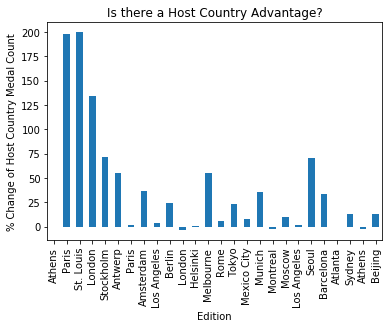

In [15]:
#Seleccionamos la columna change
change = influence.loc[:, 'Change']

#Hacemos el plot
ax = change.plot(kind = 'bar')

#Renombramos los ejes
ax.set_ylabel("% Change of Host Country Medal Count")
ax.set_title("Is there a Host Country Advantage?")
ax.set_xticklabels(editions['City'])

#Mostramos el resultado
plt.show()